In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def transformacion(A):
    # Veremos como la matriz deforma nuestro espacio
    # Usaremos de ejemplo una bola unidad
    r = np.linspace(0, 2 * np.pi, 100)
    cos = np.cos(r)
    sin = np.sin(r)

    # Genero transformación de la bola unidad
    y0 = np.zeros(100)
    y1 = np.zeros(100)
    for i in range(100):
        res = A @ np.array([cos[i], sin[i]])
        y0[i] = res[0]
        y1[i] = res[1]

    # Grafico ambas
    plt.plot(cos, sin, label="bola unidad")
    plt.plot(y0, y1, label="transformacion")
    plt.legend()
    plt.axis("equal")
    plt.show()

def nivel(N, niveles):
    A = np.random.randn(2, 2)
    """
    Notar que siempre que A sea no singular, la siguiente matriz va a ser SDP, pues:
    (A@A.T).T = (A.T).T @ A.T = A @ A.T  => Simetrica
    x.T(A A.T)x = (x.T A)(A.T x) = y.T y = ||y||^2 > 0 => definida positiva
    """
    A = A @ A.T 
    # Crear un conjunto de puntos en x y en y.
    X = np.linspace(-5, 5, N)
    Y = np.linspace(-5, 5, N)

    # Generar un mallado del espacio XxY en R^2
    XX, YY = np.meshgrid(X, Y)
    ZZ = np.zeros((N, N))

    # Definir el valor de x.T A x en todos los pares ordenados
    for idx in range(N):
        for jdx in range(N):
            vector = np.array([
                XX[idx, jdx],
                YY[idx, jdx],
            ])
            ZZ[idx, jdx] = vector.T @ A @ vector

    # Contour nos permite generar las curvas de nivel

    fig, ax = plt.subplots()
    CS = ax.contour(XX, YY, ZZ, niveles)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.axis("equal")
    plt.show()
    
    return A #Este return es solo para usarlo como parámetro de la función transformación

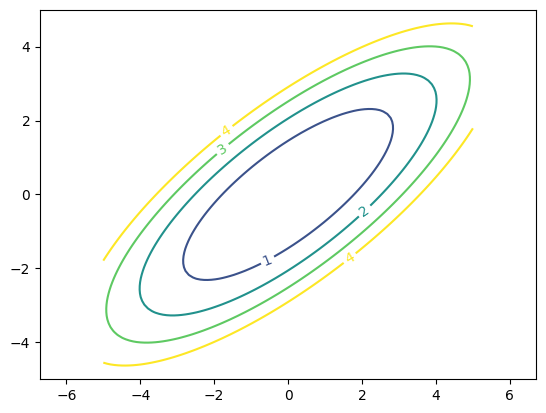

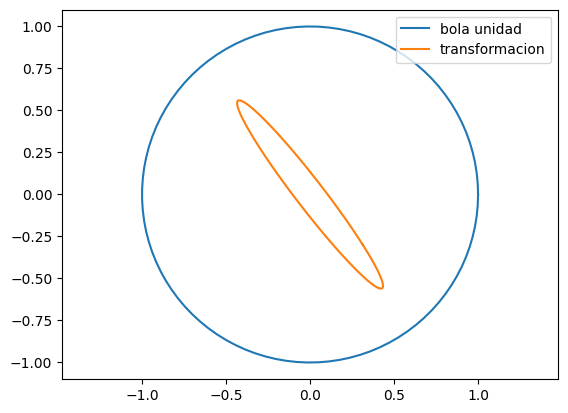

In [4]:
H= nivel(100, [0, 1, 2, 3, 4])
transformacion(H)